In [1]:
%matplotlib inline
import numpy as np
import quantities as pq
import os
#os.environ['NEURON_HOME'] = '/Applications/NEURON-7.6/nrn/x86_64'

### All of these will use the default 'jNeuroML backend'.  You should set `backend` in the line where the model is instantiation line to your backend.

## OpenWorm ion channel model

In [2]:
# A model of one ion channel type from C. elegans
from neuronunit.models.channel import ChannelModel
model_url = ("https://raw.githubusercontent.com/openworm/ChannelWorm2"
             "/master/NML2_models/EGL-19.channel.nml")
# model_url = ("/home/rgerkin/EGL-19.channel.nml")
model = ChannelModel(model_url, channel_index=0)

/Users/rgerkin/miniconda3/lib/python3.7/site-packages/airspeed/__init__.py:505: FutureWarning: Possible nested set at position 8
  KEYVALSEP = re.compile(r'[ \t]*:[[ \t]*(.*)$', re.S)


In [3]:
# A test for the ion channel's IV curve (current vs voltage relationship)
from neuronunit.tests.channel import IVCurveSSTest
# Made up observations
voltage = np.array([-80, -60, -40, -20, 0, 20, 40, 60]) * pq.mV
current = np.array([10, 0, -30, -50, -20, 20, 50, 100]) * pq.pA
test = IVCurveSSTest(observation = {'v': voltage, 
                                    'i': current})

/Users/rgerkin/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [4]:
score = test.judge(model)
score.summarize()
# This test should be a BooleanScore(False) because this made-up date does not much resemble
# the model's output
assert score.score == False
# The raw measure of disagreement should be ~1.5e5 pA^2
assert 1e5 * pq.pA**2 < score._raw < 2e5 * pq.pA**2

pyNeuroML >>> Reloading data specified in LEMS file: /Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/examples/model_zoo/LEMS_Test_ca_boyle.xml (/Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/examples/model_zoo/LEMS_Test_ca_boyle.xml), base_dir: ., cwd: /Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/examples/model_zoo
pyNeuroML >>> Looking at holding voltage -0.1 V, and currents between times 0.01 s and 0.09 s
pyNeuroML >>> Looking at holding voltage -0.08 V, and currents between times 0.01 s and 0.09 s
pyNeuroML >>> Looking at holding voltage -0.06 V, and currents between times 0.01 s and 0.09 s
pyNeuroML >>> Looking at holding voltage -0.04 V, and currents between times 0.01 s and 0.09 s
pyNeuroML >>> Looking at holding voltage -0.02 V, and currents between times 0.01 s and 0.09 s
pyNeuroML >>> Looking at holding voltage 0.0 V, and currents between times 0.01 s and 0.09 s
pyNeuroML >>> Looking at holding voltage 0.02 V, and currents between times 0.01 s an

## Izhikevich reduced neuron model

In [5]:
from neuronunit.models.reduced import ReducedModel
# The 2007 Izhikevich model with units
model_url = ("https://raw.githubusercontent.com/scidash/neuronunit"
             "/dev/neuronunit/models/NeuroML2/LEMS_2007One.xml")
model = ReducedModel(model_url)#, backend='NEURON')

In [6]:
# An input resistance test
from neuronunit.tests.passive import InputResistanceTest
# Made up observations
test = InputResistanceTest(observation={'mean': 100*pq.MOhm, 
                                        'std': 50*pq.MOhm})

In [7]:
score = test.judge(model)
score.summarize()
# The Z-score should be around -0.4
assert -0.5 < score.score < -0.3

In [8]:
# A serial rheobase test
from neuronunit.tests.fi import RheobaseTest
# Made up observations
test = RheobaseTest(observation={'mean': 100*pq.pA, 
                                 'std': 25*pq.pA})

In [9]:
score = test.judge(model)
score.summarize()
# The RatioScore should be around 0.5
assert 0.4 < score.score < 0.6

Highest subthreshold current is 51.5625 pA
Lowest suprathreshold current is 52.1484375 pA


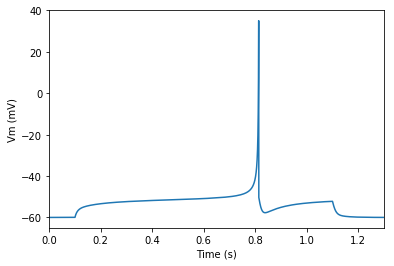

In [10]:
# There should be one or a small number of action potentials in this plot
score.plot_vm()

In [11]:
# A parallel rheobase test (runs on multiple cores at once)
from neuronunit.tests.fi import RheobaseTestP
# Made up observations
test = RheobaseTestP(observation={'mean': 100*pq.pA, 
                                 'std': 25*pq.pA})

In [12]:
score = test.judge(model)
score.summarize()
# The RatioScore should be around 0.5
assert 0.4 < score.score < 0.6

/Users/rgerkin/miniconda3/lib/python3.7/tempfile.py:796: ResourceWarning: Implicitly cleaning up <TemporaryDirectory '/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpbwhvq9mm'>
  _warnings.warn(warn_message, ResourceWarning)
/Users/rgerkin/miniconda3/lib/python3.7/tempfile.py:796: ResourceWarning: Implicitly cleaning up <TemporaryDirectory '/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpy1vnssqv'>
  _warnings.warn(warn_message, ResourceWarning)
/Users/rgerkin/miniconda3/lib/python3.7/tempfile.py:796: ResourceWarning: Implicitly cleaning up <TemporaryDirectory '/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpdi7u_m3n'>
  _warnings.warn(warn_message, ResourceWarning)
/Users/rgerkin/miniconda3/lib/python3.7/tempfile.py:796: ResourceWarning: Implicitly cleaning up <TemporaryDirectory '/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpm1ug303v'>
  _warnings.warn(warn_message, ResourceWarning)
/Users/rgerkin/miniconda3/lib/python3.7/tempfile.py:796: ResourceWarning: Implicitly

Getting rheobase vm


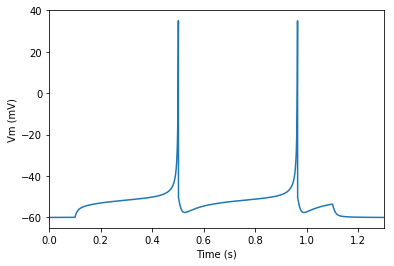

In [13]:
# There should be one or a small number of action potentials in this plot
score.plot_vm()

## Allen Institute GLIF Model

In [14]:
from neuronunit.models.reduced import ReducedModel
model_url = ("https://raw.githubusercontent.com/OpenSourceBrain/AllenInstituteNeuroML"
             "/master/CellTypesDatabase/models/NeuroML2/LEMS_472424854.xml")
model = ReducedModel(model_url)

In [15]:
from neuronunit.tests.dynamics import ISITest
# Made up observation for inter-spike interval statistics
test = ISITest(observation={'mean': 100*pq.ms, 
                            'std': 50*pq.ms})
# I don't know what to expect here because jNeuroML isn't working for this model and my NEURON installation is broken.  
# But maybe it works in Geppetto?
test.judge(model)

No results returned: buffered error, warning, and notice messages follow:

pyNeuroML >>> *** Problem running command: 
pyNeuroML >>>        Command 'java -Xmx400M  -Djava.awt.headless=true -jar  "/Users/rgerkin/miniconda3/lib/python3.7/site-packages/pyneuroml/lib/jNeuroML-0.8.4-jar-with-dependencies.jar"  "/var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpjd65xte7/LEMS_472424854.xml"  -nogui -I '/Users/rgerkin/Dropbox/dev/scidash/neuronunit/neuronunit/examples/model_zoo'' returned non-zero exit status 1.
pyNeuroML >>>  jNeuroML >>   jNeuroML v0.8.4
pyNeuroML >>>  jNeuroML >>  Loading: /var/folders/_j/vg2m860n23d_9ty1h2z9_2880000gn/T/tmpjd65xte7/LEMS_472424854.xml with jLEMS, NO GUI mode...
pyNeuroML >>>  jNeuroML >>  org.neuroml.export.exceptions.ModelFeatureSupportException: Feature not supported in LEMS: MULTICOMPARTMENTAL_CELL_MODEL (Model with multicompartmental cell(s))
pyNeuroML >>>  jNeuroML >>      Level of support for MULTICOMPARTMENTAL_CELL_MODEL in LEMS is insufficient: NO

AttributeError: 'bool' object has no attribute 'keys'

In [ ]:
# Other models you could try
#url = ("https://raw.githubusercontent.com/OpenSourceBrain/PinskyRinzelModel"
#       "/master/NeuroML2/twoCompartment/twoCompartmentCell.cell.nml")
#url = ("https://raw.githubusercontent.com/OpenSourceBrain/PyloricNetwork"
#       "/master/NeuroML2/LP_1.cell.nml")
#url = ('LEMS_2007One.xml')